In [33]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

from ROOT import TLatex



rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)




#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

In [49]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

In [1]:

#load libraries 
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
#import ROOT
#from ROOT import TFile

import root_pandas
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

Welcome to JupyROOT 6.22/02


In [ ]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [ ]:
def applyCutsElectrons(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'TargType==2')
    temp = applyCut(temp, 'y < 0.85', 'y< 0.85')

    return temp

In [7]:
path = '/home/miguel/EG2_DATA/sebastian/'
data_electrons = root_pandas.read_root(path+'C.root', "ntuple_data_electrons")
data_hadron = root_pandas.read_root(path+'C.root', "ntuple_data")

In [40]:
data_electrons = data_electrons.query('TargType==2')
data_hadron    = data_hadron.query('TargType==2')

In [3]:
path = '/home/miguel/EG2_DATA/sebastian/sim/'
mc_electrons = root_pandas.read_root(path+'C.root', "ntuple_accept_electrons")
mc_hadron = root_pandas.read_root(path+'C.root', "ntuple_accept")

array([[<AxesSubplot:title={'center':'Q2'}>,
        <AxesSubplot:title={'center':'Xb'}>,
        <AxesSubplot:title={'center':'Nu'}>,
        <AxesSubplot:title={'center':'TargType'}>],
       [<AxesSubplot:title={'center':'VC_RD'}>,
        <AxesSubplot:title={'center':'VC_TM'}>,
        <AxesSubplot:title={'center':'YC'}>,
        <AxesSubplot:title={'center':'Sector'}>],
       [<AxesSubplot:title={'center':'Nphe'}>,
        <AxesSubplot:title={'center':'cc_mirror'}>,
        <AxesSubplot:title={'center':'cctheta'}>,
        <AxesSubplot:title={'center':'mirrorNumber'}>],
       [<AxesSubplot:title={'center':'ThetaLab'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'Px'}>,
        <AxesSubplot:title={'center':'Py'}>],
       [<AxesSubplot:title={'center':'Pz'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

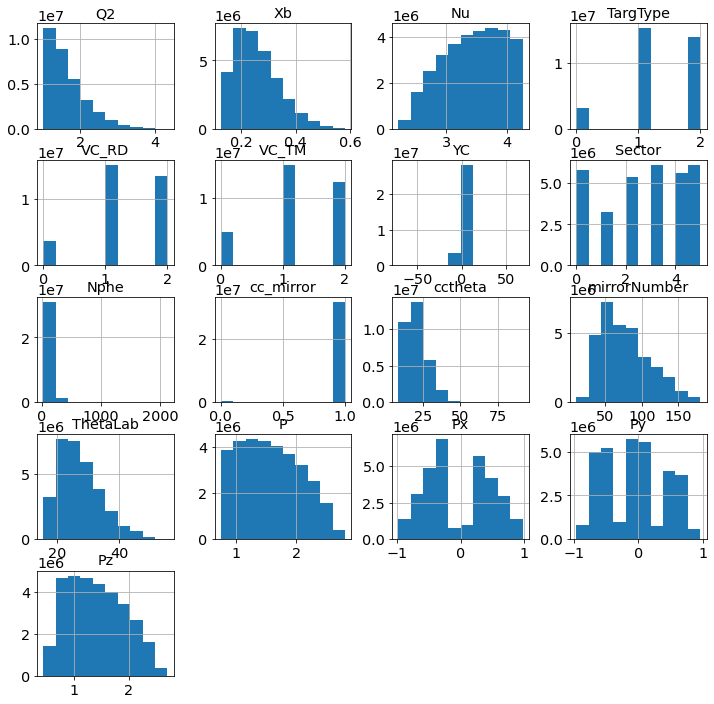

In [5]:
data_electrons.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'Q2'}>,
        <AxesSubplot:title={'center':'Xb'}>,
        <AxesSubplot:title={'center':'Nu'}>,
        <AxesSubplot:title={'center':'TargType'}>],
       [<AxesSubplot:title={'center':'VC_RD'}>,
        <AxesSubplot:title={'center':'VC_TM'}>,
        <AxesSubplot:title={'center':'YC'}>,
        <AxesSubplot:title={'center':'Sector'}>],
       [<AxesSubplot:title={'center':'Nphe'}>,
        <AxesSubplot:title={'center':'cc_mirror'}>,
        <AxesSubplot:title={'center':'cctheta'}>,
        <AxesSubplot:title={'center':'mirrorNumber'}>],
       [<AxesSubplot:title={'center':'ThetaLab'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'Px'}>,
        <AxesSubplot:title={'center':'Py'}>],
       [<AxesSubplot:title={'center':'Pz'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

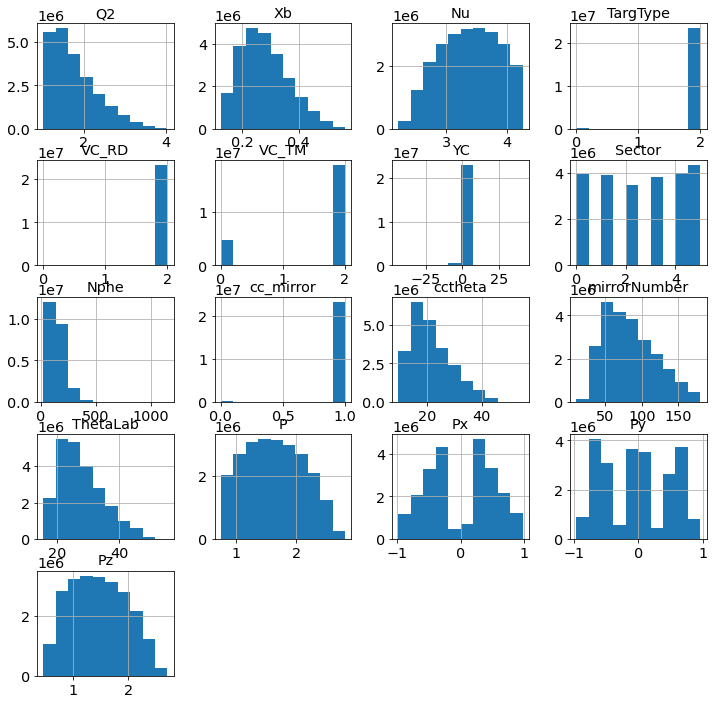

In [4]:
mc_electrons.hist(figsize=(12,12))

In [41]:
print (data_electrons.shape[0])
print (mc_electrons.shape[0])

13915487
23395408


In [ ]:
data_hadron.keys()

In [ ]:
data_hadron.hist(figsize=(12,12))
plt.show()

## pT vs z 

In [ ]:
fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(16,4), gridspec_kw={'hspace': 0, 'wspace':0})


Edges = [0.0,0.2,0.4,0.6,0.8,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'Zh>%2.2f and Zh<%2.2f and PID==211'%(ibin[0],ibin[1])
    axs[j].hist(data_hadron.query(query)['Pt2'],density=True,range=(0.0,1.80),bins=10,alpha=0.6,label='data')
    axs[j].hist(mc_hadron.query(query)['Pt2'],density=True,range=(0.0,1.80),bins=10,alpha=0.6,label='MC')

    axs[j].set_yscale('log')
    axs[j].set_title('%2.2f<z<%2.2f'%(ibin[0],ibin[1]))
    print(query)
axs[0].legend()

## Phi PQ

Zh>0.00 and Zh<0.20 and PID==211
Zh>0.20 and Zh<0.40 and PID==211
Zh>0.40 and Zh<0.60 and PID==211
Zh>0.60 and Zh<0.80 and PID==211
Zh>0.80 and Zh<1.00 and PID==211


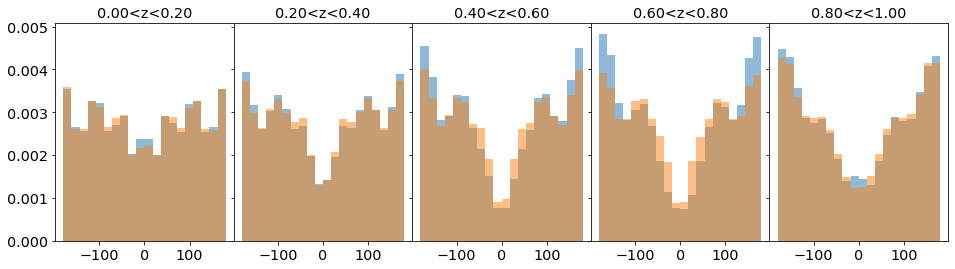

In [11]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(16,4), gridspec_kw={'hspace': 0, 'wspace':0})


Edges = [0.0,0.2,0.4,0.6,0.8,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'Zh>%2.2f and Zh<%2.2f and PID==211'%(ibin[0],ibin[1])
    axs[j].hist(data_hadron.query(query)['PhiPQ'],density=True,bins=20,alpha=0.5)
    axs[j].hist(mc_hadron.query(query)['PhiPQ'],density=True,bins=20,alpha=0.5)

    axs[j].set_title('%2.2f<z<%2.2f'%(ibin[0],ibin[1]))

    #axs[j].set_yscale('log')

    print(query)

## ThetaLab

Zh>0.00 and Zh<0.20 and PID==211
Zh>0.20 and Zh<0.40 and PID==211
Zh>0.40 and Zh<0.60 and PID==211
Zh>0.60 and Zh<0.80 and PID==211
Zh>0.80 and Zh<1.00 and PID==211


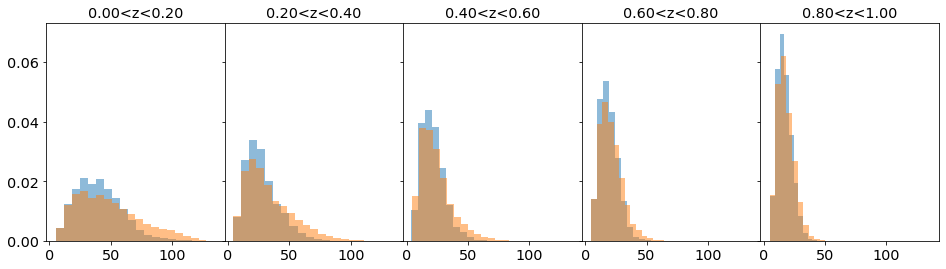

In [12]:
fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(16,4), gridspec_kw={'hspace': 0, 'wspace':0})


Edges = [0.0,0.2,0.4,0.6,0.8,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'Zh>%2.2f and Zh<%2.2f and PID==211'%(ibin[0],ibin[1])
    axs[j].hist(data_hadron.query(query)['ThetaLab'],density=True,bins=20,alpha=0.5)
    axs[j].hist(mc_hadron.query(query)['ThetaLab'],density=True,bins=20,alpha=0.5)

    axs[j].set_title('%2.2f<z<%2.2f'%(ibin[0],ibin[1]))

    #axs[j].set_yscale('log')

    print(query)

Zh>0.00 and Zh<0.20 and PID==211
Zh>0.20 and Zh<0.40 and PID==211
Zh>0.40 and Zh<0.60 and PID==211
Zh>0.60 and Zh<0.80 and PID==211
Zh>0.80 and Zh<1.00 and PID==211


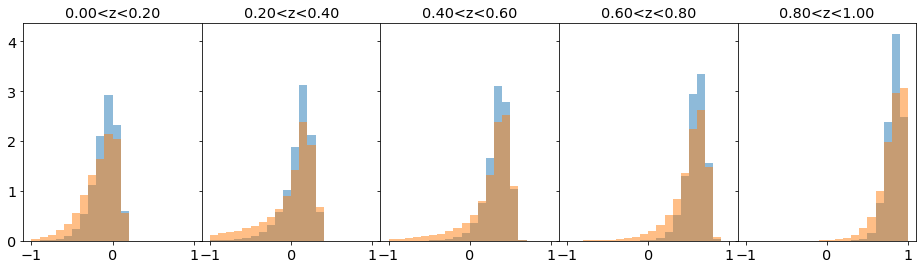

In [14]:
fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(16,4), gridspec_kw={'hspace': 0, 'wspace':0})


Edges = [0.0,0.2,0.4,0.6,0.8,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'Zh>%2.2f and Zh<%2.2f and PID==211'%(ibin[0],ibin[1])
    axs[j].hist(data_hadron.query(query)['Xf'],density=True,range=(-1.0,1.0),bins=20,alpha=0.5)
    axs[j].hist(mc_hadron.query(query)['Xf'],density=True,range=(-1.0,1.0),bins=20,alpha=0.5)

    axs[j].set_title('%2.2f<z<%2.2f'%(ibin[0],ibin[1]))

    #axs[j].set_yscale('log')

    print(query)

## P momentum

Zh>0.00 and Zh<0.20 and PID==211
Zh>0.20 and Zh<0.40 and PID==211
Zh>0.40 and Zh<0.60 and PID==211
Zh>0.60 and Zh<0.80 and PID==211
Zh>0.80 and Zh<1.00 and PID==211


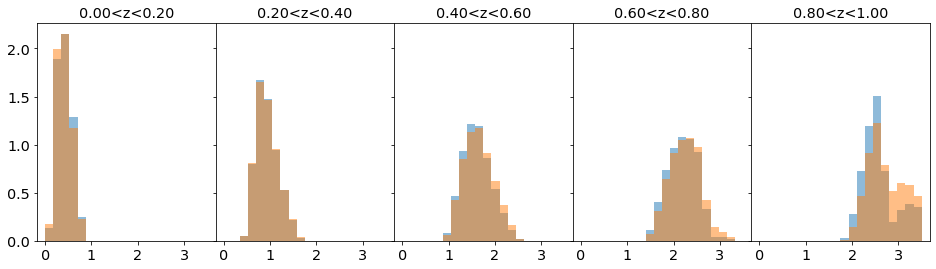

In [15]:
fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(16,4), gridspec_kw={'hspace': 0, 'wspace':0})


Edges = [0.0,0.2,0.4,0.6,0.8,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'Zh>%2.2f and Zh<%2.2f and PID==211'%(ibin[0],ibin[1])
    axs[j].hist(data_hadron.query(query)['P'],density=True,range=(0.0,3.5),bins=20,alpha=0.5)
    axs[j].hist(mc_hadron.query(query)['P'],density=True,range=(0.0,3.5),bins=20,alpha=0.5)

    axs[j].set_title('%2.2f<z<%2.2f'%(ibin[0],ibin[1]))

    #axs[j].set_yscale('log')

    print(query)

## Px

Zh>0.00 and Zh<0.20 and PID==211
Zh>0.20 and Zh<0.40 and PID==211
Zh>0.40 and Zh<0.60 and PID==211
Zh>0.60 and Zh<0.80 and PID==211
Zh>0.80 and Zh<1.00 and PID==211


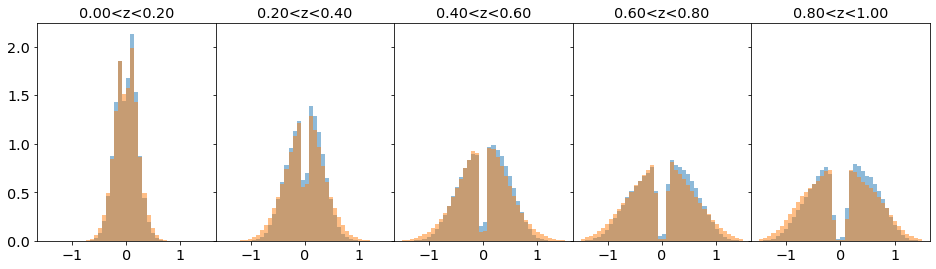

In [16]:
fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(16,4), gridspec_kw={'hspace': 0, 'wspace':0})


Edges = [0.0,0.2,0.4,0.6,0.8,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'Zh>%2.2f and Zh<%2.2f and PID==211'%(ibin[0],ibin[1])
    axs[j].hist(data_hadron.query(query)['Px'],density=True,range=(-1.5,1.5),bins=40,alpha=0.5)
    axs[j].hist(mc_hadron.query(query)['Px'],density=True,range=(-1.5,1.5),bins=40,alpha=0.5)

    axs[j].set_title('%2.2f<z<%2.2f'%(ibin[0],ibin[1]))

    #axs[j].set_yscale('log')

    print(query)

Zh>0.00 and Zh<0.20 and PID==211
Zh>0.20 and Zh<0.40 and PID==211
Zh>0.40 and Zh<0.60 and PID==211
Zh>0.60 and Zh<0.80 and PID==211
Zh>0.80 and Zh<1.00 and PID==211


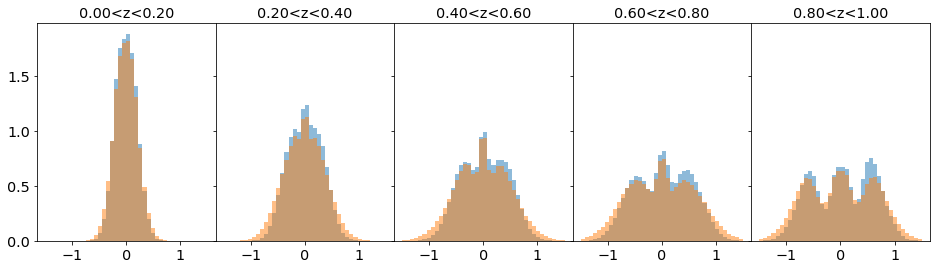

In [28]:
fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(16,4), gridspec_kw={'hspace': 0, 'wspace':0})


Edges = [0.0,0.2,0.4,0.6,0.8,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'Zh>%2.2f and Zh<%2.2f and PID==211'%(ibin[0],ibin[1])
    axs[j].hist(data_hadron.query(query)['Py'],density=True,range=(-1.5,1.5),bins=40,alpha=0.5)
    axs[j].hist(mc_hadron.query(query)['Py'],density=True,range=(-1.5,1.5),bins=40,alpha=0.5)

    axs[j].set_title('%2.2f<z<%2.2f'%(ibin[0],ibin[1]))

    #axs[j].set_yscale('log')

    print(query)

## Electron variables

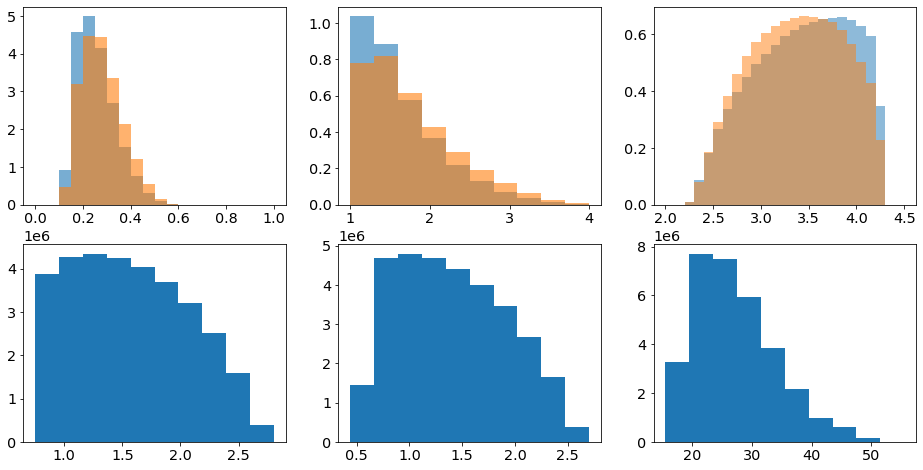

In [31]:
fig, axs = plt.subplots(2, 3, sharey=False, figsize=(16,8))
axs[0,0].hist(data_electrons['Xb'],density=True,alpha=0.6,range=(0.0,1.0),bins=20)
axs[0,0].hist(mc_electrons['Xb'],density=True,alpha=0.6,range=(0,1.0),bins=20)

axs[0,1].hist(data_electrons['Q2'],density=True,range=(1.0,4.0),alpha=0.6)
axs[0,1].hist(mc_electrons['Q2'],density=True,range=(1.0,4.0),alpha=0.6)

axs[0,2].hist(data_electrons['Nu'],density=True,bins=25,range=(2.0,4.5),alpha=0.5)
axs[0,2].hist(mc_electrons['Nu'],density=True,bins=25,range=(2.0,4.5),alpha=0.5)

axs[1,0].hist(data_electrons['P'],density=True,bins=25,alpha=0.5)
axs[1,0].hist(mc_electrons['P'],density=True,bins=25,alpha=0.5)

axs[1,1].hist(data_electrons['Pz'],density=True,bins=25,alpha=0.5)
axs[1,1].hist(mc_electrons['Pz'],density=True,bins=25,alpha=0.5)

axs[1,2].hist(data_electrons['ThetaLab'],density=True,bins=25,alpha=0.5)
axs[1,2].hist(mc_electrons['ThetaLab'],density=True,bins=25,alpha=0.5)

plt.show()

In [34]:
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

2020-11-21 15:58:08.287522: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/miguel/anaconda3/envs/my_root_env/lib:
2020-11-21 15:58:08.287569: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [45]:
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))
"""    Arguments:
        num_observables: number of observables to 
                            simultaneously unfold (integer)
                            
        iterations: number of iterations (integer)
        
        theta0_G: tuple or list of nominal 
                    generation-level observables as Numpy arrays
                    
        theta0_S: tuple or list of nominal 
                    simulation-level observables as Numpy arrays
                    
        theta_unknown_S: tuple or list of "natural" 
                            (unknown) simulation-level observables 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S):

    theta0_G = np.stack(theta0_G, axis=1)
    theta0_S = np.stack(theta0_S, axis=1)
    theta_unknown_S = np.stack(theta_unknown_S, axis=1)

    labels0 = np.zeros(len(theta0_G))
    labels1 = np.ones(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))
    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))
    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels1))
    
    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    # shape = (iteration, step, event)

    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_G))

    inputs = Input((num_observables, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                                  verbose=0,
                                  restore_best_weights=True)

    # from NN (DCTR)
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(np.nan_to_num(weights)) # np.squeeze(weights)

    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate(
            (weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_1,
                  Y_train_1,
                  sample_weight=w_train_1,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_1, Y_test_1, w_test_1),
                  callbacks=[earlystopping],
                  verbose=0)

        weights_pull = weights_push * reweight(theta0_S)
        weights[i, :1, :] = weights_pull
        
        print('Max and min weight_pull in Step #1')
        print(max(weights[i, 1, :]))
        print(min(weights[i, 1, :]))
        

    return weights, model

In [88]:
Xb_0_G = mc_electrons['Xb'][:300000]
Xb_0_S =mc_electrons['Xb'][:300000]
Xb_unknown_S = data_electrons['Xb'][:50000]

Q2_0_G = mc_electrons['Q2'][:300000]
Q2_0_S =mc_electrons['Q2'][:300000]
Q2_unknown_S = data_electrons['Q2'][:50000]

P_0_G = mc_electrons['P'][:300000]
P_0_S =mc_electrons['P'][:300000]
P_unknown_S = data_electrons['P'][:50000]

Px_0_G = mc_electrons['Px'][:300000]
Px_0_S =mc_electrons['Px'][:300000]
Px_unknown_S = data_electrons['Px'][:50000]


Py_0_G = mc_electrons['Py'][:300000]
Py_0_S =mc_electrons['Py'][:300000]
Py_unknown_S = data_electrons['Py'][:50000]


Pz_0_G = mc_electrons['Pz'][:300000]
Pz_0_S =mc_electrons['Pz'][:300000]
Pz_unknown_S = data_electrons['Pz'][:50000]

ThetaLab_0_G = mc_electrons['ThetaLab'][:300000]
ThetaLab_0_S =mc_electrons['ThetaLab'][:300000]
ThetaLab_unknown_S = data_electrons['ThetaLab'][:50000]


mirrorNumber_0_G = mc_electrons['mirrorNumber'][:300000]
mirrorNumber_0_S =mc_electrons['mirrorNumber'][:300000]
mirrorNumber_unknown_S = data_electrons['mirrorNumber'][:50000]


Sector_0_G = mc_electrons['Sector'][:300000]
Sector_0_S =mc_electrons['Sector'][:300000]
Sector_unknown_S = data_electrons['Sector'][:50000]

print(len(Xb_0_G))

300000


In [46]:
K.clear_session()

In [ ]:
num_observables = 3

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=3,
                       theta0_G=(Px_0_G, Py_0_G, Pz_0_G),
                       theta0_S=(Px_0_S, Py_0_S, Pz_0_S),
                       theta_unknown_S=(Py_unknown_S,
                                        Py_unknown_S,
                                        Pz_unknown_S
                                        )
                      )


ITERATION: 1

STEP 1

Max and min weight_pull in Step #1
nan
nan

ITERATION: 2

STEP 1



In [51]:
print(weights)

[[[0.15785272 0.16899134 0.1672927  ... 0.11836282 0.08470428 0.10609581]
  [0.         0.         0.         ... 0.         0.         0.        ]]]


In [55]:
weights[-1, 1, :]
weights[-1, 0, :]

array([0.15785272, 0.16899134, 0.1672927 , ..., 0.11836282, 0.08470428,
       0.10609581])

ITERATION: 1


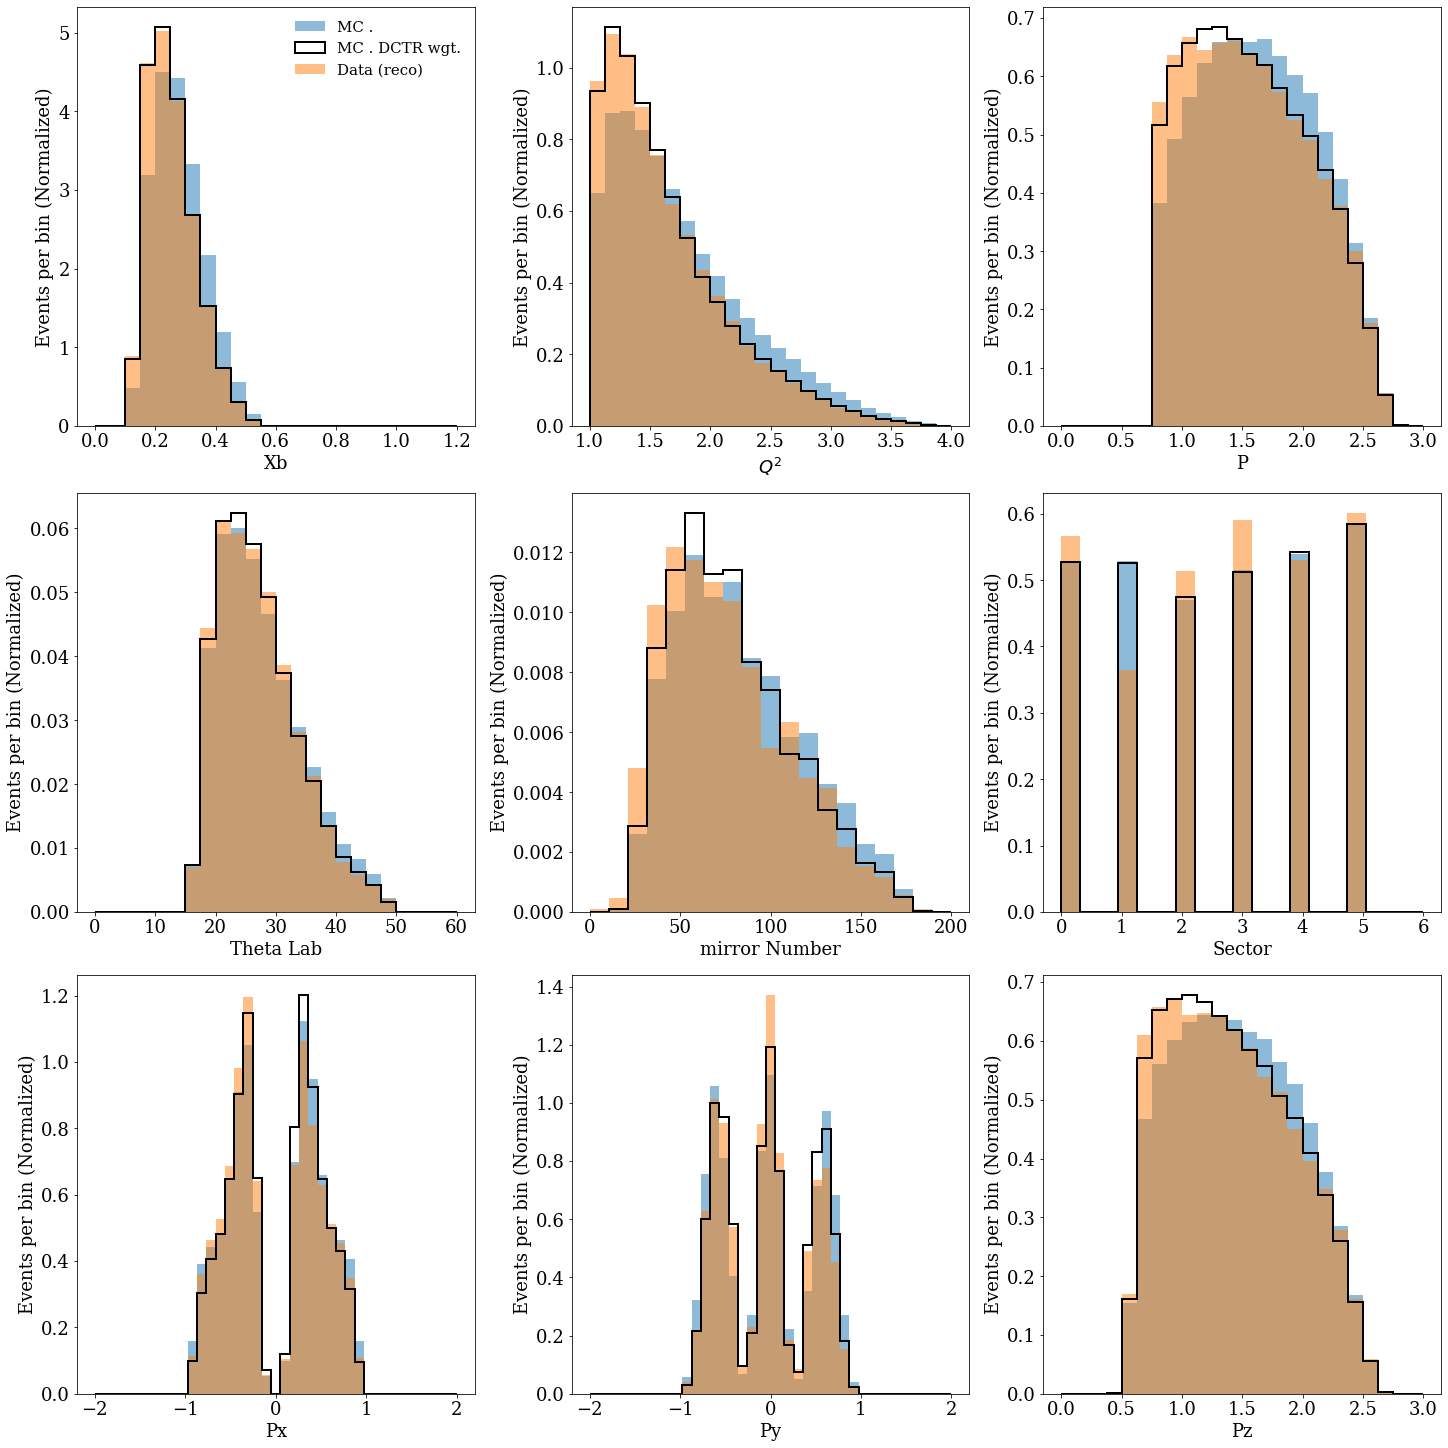

In [89]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(0.0, 1.2, 25)
    
    fig, ax = plt.subplots(3,
                           3,
                           figsize=(20, 20),
                           constrained_layout=True)
    ax[0,0].set_xlabel('Xb')
    ax[0,0].set_ylabel('Events per bin (Normalized)')
    ax[0,0].hist(Xb_0_S, bins=bins, label=r'MC .', **plot_style_2)
    ax[0,0].hist(Xb_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC . DCTR wgt.',
               **plot_style_1)

    ax[0,0].hist(Xb_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    ax[0,0].legend(frameon=False,loc='best')
   
    bins = np.linspace(1.0, 4.0, 25)

    
    ax[0,1].set_xlabel(r'$Q^{2}$')
    ax[0,1].set_ylabel('Events per bin (Normalized)')
    ax[0,1].hist(Q2_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[0,1].hist(Q2_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[0,1].hist(Q2_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    
    bins = np.linspace(0.0, 3.0, 25)

    
    ax[0,2].set_xlabel('P')
    ax[0,2].set_ylabel('Events per bin (Normalized)')
    ax[0,2].hist(P_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[0,2].hist(P_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[0,2].hist(P_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    
    bins = np.linspace(0.0, 60.0, 25)

    ax[1,0].set_xlabel('Theta Lab')
    ax[1,0].set_ylabel('Events per bin (Normalized)')
    ax[1,0].hist(ThetaLab_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[1,0].hist(ThetaLab_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[1,0].hist(ThetaLab_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    
    bins = np.linspace(0.0, 200.0, 20)

    ax[1,1].set_xlabel('mirror Number')
    ax[1,1].set_ylabel('Events per bin (Normalized)')
    ax[1,1].hist(mirrorNumber_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[1,1].hist(mirrorNumber_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[1,1].hist(mirrorNumber_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    
    
    
    bins = np.linspace(0.0, 6, 20)

    ax[1,2].set_xlabel('Sector')
    ax[1,2].set_ylabel('Events per bin (Normalized)')
    ax[1,2].hist(Sector_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[1,2].hist(Sector_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[1,2].hist(Sector_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    
    bins = np.linspace(-2, 2, 40)

    ax[2,0].set_xlabel('Px')
    ax[2,0].set_ylabel('Events per bin (Normalized)')
    ax[2,0].hist(Px_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[2,0].hist(Px_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[2,0].hist(Px_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    
    
    bins = np.linspace(-2, 2, 40)

    ax[2,1].set_xlabel('Py')
    ax[2,1].set_ylabel('Events per bin (Normalized)')
    ax[2,1].hist(Py_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[2,1].hist(Py_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[2,1].hist(Py_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    
    bins = np.linspace(0.0, 3.0, 25)

    
    ax[2,2].set_xlabel('Pz')
    ax[2,2].set_ylabel('Events per bin (Normalized)')
    ax[2,2].hist(Pz_0_S, bins=bins, label=r'MC (reco).', **plot_style_2)
    ax[2,2].hist(Pz_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'MC (reco). DCTR wgt.',
               **plot_style_1)

    ax[2,2].hist(Pz_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)

